(array([3097.,  626.,  239.,  128.,   86.,   39.,   36.,   53.,   12.,
          23.]),
 array([0.00457312, 0.10288764, 0.20120217, 0.29951669, 0.39783121,
        0.49614573, 0.59446025, 0.69277478, 0.7910893 , 0.88940382,
        0.98771834]),
 <BarContainer object of 10 artists>)

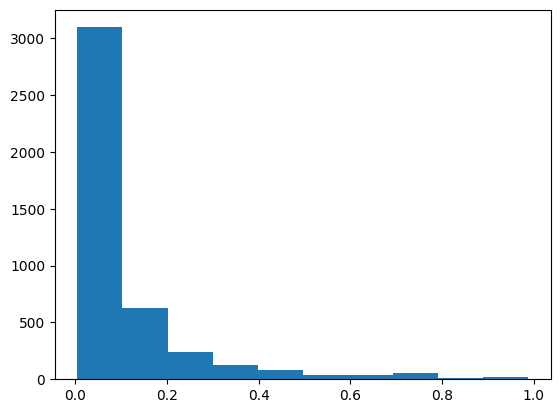

In [50]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


df = pd.read_csv('all_XG_data_2.csv')
df.head()
df.shape

plt.hist(df['XG'])

In [51]:
variables = df.columns
input_variables = variables[variables != 'XG']

X = df[input_variables]
y = df['XG']
y_log = np.log(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

print(y_train)
print(y)


227    -1.067368
964    -3.486132
2045   -4.176398
1025   -2.692075
4241   -3.067197
          ...   
3444   -1.925939
466    -4.556152
3092   -3.136127
3772   -0.237750
860    -3.445443
Name: XG, Length: 3471, dtype: float64
0       0.030637
1       0.010763
2       0.031976
3       0.008036
4       0.050775
          ...   
4334    0.048067
4335    0.138549
4336    0.449640
4337    0.504271
4338    0.035364
Name: XG, Length: 4339, dtype: float64


In [52]:


variables = df.columns
input_variables = variables[variables != 'XG']

X = df[input_variables]
y = df['XG']
y_log = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=90)

param_distributions = {
    'booster': ['gblinear', 'dart', 'gbtree'],  # List of discrete values
    'learning_rate': uniform(0.001, 0.1),  # Continuous uniform distribution between 0.01 and 0.2
    'max_leaves': randint(20, 200),  # Integer values between 20 and 100
    'n_estimators': randint(50, 400),  # Integer values between 50 and 300
    'max_depth': randint(3, 15),  # Integer values between 3 and 10
    'grow_policy': ['depthwise', 'lossguide'],  # List of discrete values
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=2,
    verbose=3,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best Random Search Score: {random_search.best_score_:.5f}")
print(f"Best Random Search Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Score: -0.81529
Best Random Search Parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.06630205132311011), 'max_depth': 8, 'max_leaves': 38, 'n_estimators': 328}


Mean Absolute Error (MAE): 0.0613840516178006


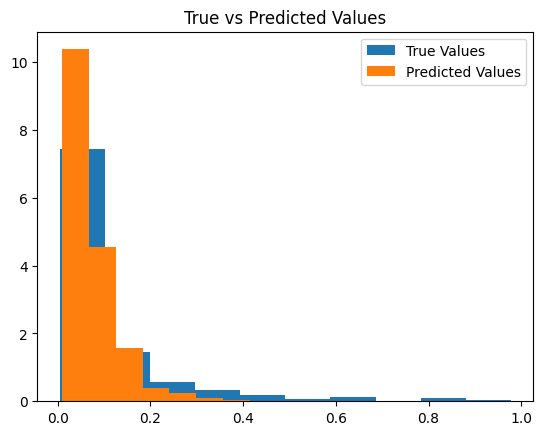

In [57]:
import matplotlib.pyplot as plt

def mae(y_true, y_pred):
    return np.mean(abs((y_true - y_pred)))

#new_params = {'booster': 'gbtree',
#              'grow_policy': 'lossguide', 
#              'learning_rate': np.float64(0.05185817934340634), 
#              'max_depth': 9, 
#              'max_leaves': 35, 
#              'n_estimators': 283}

new_params ={'booster': 'gbtree', 'grow_policy': 'depthwise', 'learning_rate': np.float64(0.03418737125398759), 'max_depth': 5, 'max_leaves': 77, 'n_estimators': 274}
new_params = {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.06630205132311011), 'max_depth': 8, 'max_leaves': 38, 'n_estimators': 328}
new_params = {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.005567896524540005), 'max_depth': 11, 'max_leaves': 90, 'n_estimators': 252}
new_params = {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.08944715976978937), 'max_depth': 13, 'max_leaves': 59, 'n_estimators': 369}
new_params =  {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.06630205132311011), 'max_depth': 8, 'max_leaves': 38, 'n_estimators': 328}

#both new params have mae of about 0.065

xgb_best = XGBRegressor(**new_params, objective='reg:squarederror', random_state=30)

xgb_best.fit(X_train, y_train)
y_score = xgb_best.predict(X_test)

meow = mae(y_test, y_score)

y_back = np.exp(y_score) 
y_back_test = np.exp(y_test) 
meow_back = mae(y_back_test, y_back)

print(f"Mean Absolute Error (MAE): {meow_back}")

plt.hist(y_back_test, label='True Values', density= True)
plt.hist(y_back, label='Predicted Values', density = True)
plt.title('True vs Predicted Values')
plt.legend()


In [58]:
print(mae(y_back_test, y_back))


hist, bins = np.histogram(y_back_test, bins=100)
print(hist)

xgb_best.feature_importances_

0.0613840516178006
[ 39 109 114  92  61  61  38  42  36  35  21  22  21  13  13   7   6   3
   8   8   8  11   9   5   5   3   2   0   1   4   0   3   4   2   3   3
   4   6   1   3   3   2   3   2   1   2   0   0   1   1   1   2   0   0
   0   0   0   2   0   1   2   0   0   0   1   2   1   1   2   1   0   0
   0   1   0   0   0   0   0   0   3   1   0   0   1   0   0   1   1   0
   0   0   0   0   0   1   0   0   0   2]


array([0.00450956, 0.00186799, 0.05630443, 0.03264053, 0.0282743 ,
       0.01536589, 0.10086169, 0.02698574, 0.01190011, 0.01872624,
       0.00924909, 0.01563481, 0.00886889, 0.00821812, 0.00942558,
       0.00651821, 0.00548445, 0.01133547, 0.01158474, 0.00670017,
       0.00665878, 0.00877087, 0.00735263, 0.0094445 , 0.00902335,
       0.00697811, 0.00594329, 0.01520141, 0.00772958, 0.00912792,
       0.02114854, 0.00689621, 0.01494811, 0.01401819, 0.00508858,
       0.01579287, 0.00834954, 0.00695998, 0.00695243, 0.02765623,
       0.01986565, 0.01155262, 0.03647471, 0.01452575, 0.01506116,
       0.02397695, 0.00618304, 0.01083997, 0.01332104, 0.00691075,
       0.00841439, 0.01209463, 0.00726907, 0.00820166, 0.0126394 ,
       0.01080439, 0.00830921, 0.0074488 , 0.0070763 , 0.01091051,
       0.00734376, 0.00720366, 0.00995481, 0.01037261, 0.00555567,
       0.00998351, 0.02241709, 0.00677875, 0.02112947, 0.02511359,
       0.00648784, 0.01128203], dtype=float32)

C:\Users\nrt\AppData\Local\Temp\ipykernel_67296\1760537452.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_variables[sorted_idx])


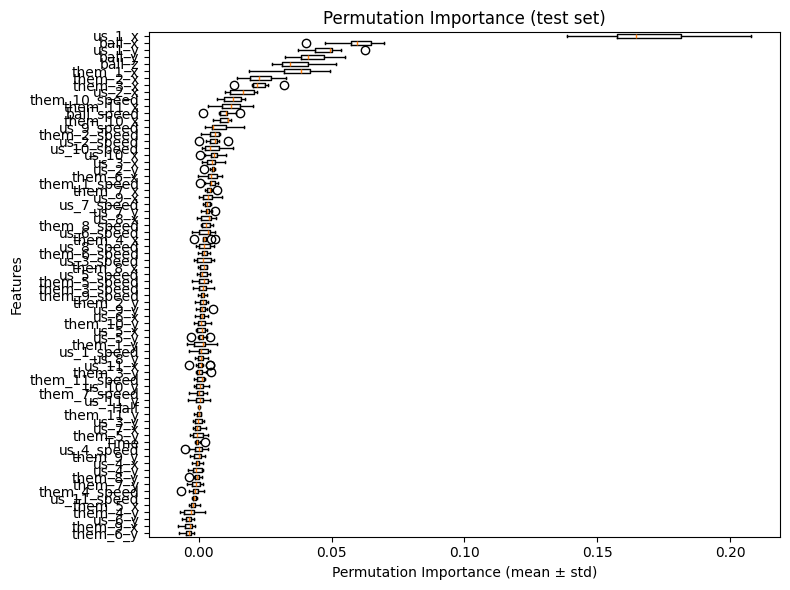

In [59]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb_best, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[::1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_variables[sorted_idx])
ax.set_title("Permutation Importance (test set)")
ax.set_xlabel("Permutation Importance (mean ± std)")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()


Index(['them_6_y', 'them_9_x', 'us_6_y', 'them_4_y', 'them_5_x', 'us_11_speed',
       'them_4_speed', 'them_7_y', 'them_8_y', 'us_4_y', 'us_4_x', 'them_9_y',
       'us_4_speed', 'Time', 'them_5_y', 'us_7_x', 'us_3_y', 'them_11_y',
       'Half', 'us_11_y', 'them_7_speed', 'us_10_y', 'them_11_speed',
       'them_3_y', 'us_11_x', 'us_8_y', 'us_1_speed', 'them_1_y', 'us_5_y',
       'us_5_x', 'them_10_y', 'us_6_x', 'us_9_y', 'them_2_y', 'them_9_speed',
       'them_3_speed', 'them_5_speed', 'us_5_speed', 'them_8_x', 'us_3_speed',
       'them_6_speed', 'us_8_speed', 'them_4_x', 'us_6_speed', 'them_8_speed',
       'us_8_x', 'us_7_y', 'us_7_speed', 'us_9_x', 'them_7_x', 'them_1_speed',
       'them_6_x', 'us_2_y', 'us_3_x', 'us_10_x', 'us_10_speed', 'us_2_speed',
       'them_2_speed', 'us_9_speed', 'them_10_x', 'ball_speed', 'them_11_x',
       'them_10_speed', 'us_2_x', 'them_3_x', 'them_2_x', 'them_1_x', 'ball_z',
       'ball_y', 'us_1_y', 'ball_x', 'us_1_x'],
      dtype='object')


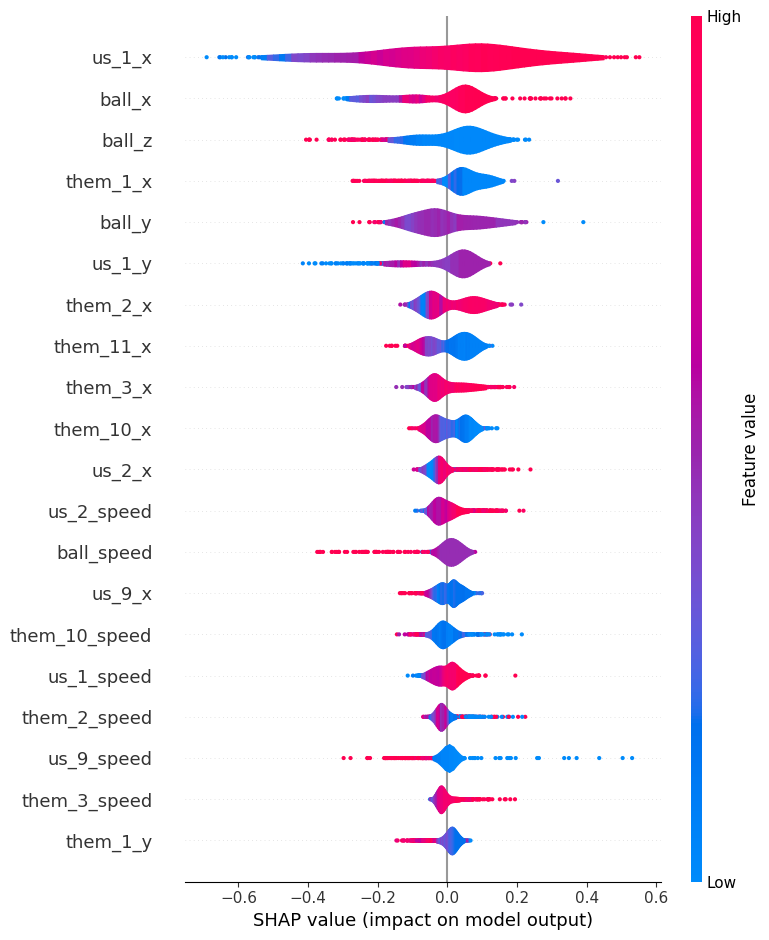

In [60]:
print(input_variables[sorted_idx])

import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, feature_names=input_variables, plot_type="violin")
plt.show()

In [65]:
def generate_random_positions(num_positions, x_min, x_max, y_min, y_max,speed_min, speed_max,  z_min, z_max,time_min, time_max):
    data = {}
    rng = np.random.default_rng()
    data['Time'] = rng.integers(time_min, time_max, num_positions)
    data['Half'] = rng.integers(1, 3, num_positions)
    data['ball_x'] = rng.uniform(x_min, x_max, num_positions)
    data['ball_y'] = rng.uniform(y_min, y_max, num_positions)
    data['ball_z'] = rng.uniform(z_min, z_max, num_positions)
    data['ball_speed'] = rng.uniform(speed_min, speed_max, num_positions)
    for i in range(1, 12):
        data[f'us_{i}_x'] = rng.uniform(x_min, x_max, num_positions)
        data[f'us_{i}_y'] = rng.uniform(y_min, y_max, num_positions)
        data[f'us_{i}_speed'] = rng.uniform(speed_min, speed_max, num_positions)
    for i in range(1, 12):
        data[f'them_{i}_x'] = rng.uniform(x_min, x_max, num_positions)
        data[f'them_{i}_y'] = rng.uniform(y_min, y_max, num_positions)
        data[f'them_{i}_speed'] = rng.uniform(speed_min, speed_max, num_positions)
    df_random = pd.DataFrame(data)
    return df_random

def xg_and_plot(random_line):
    xg = np.exp(xgb_best.predict(random_line))
    fig, ax = plt.subplots()
    ax.scatter(random_line['ball_x'], random_line['ball_y'], cmap='viridis', s=10)
    for i in range(1, 12):
        ax.scatter(random_line[f'us_{i}_x'], random_line[f'us_{i}_y'], c='blue', s=10)
        ax.scatter(random_line[f'them_{i}_x'], random_line[f'them_{i}_y'], c='red', s=10)
    ax.annotate(f'XG: {xg[0]:.2f}', xy=(random_line['ball_x'][0], random_line['ball_y'][0]), fontsize=12, color='black')
    return fig

C:\Users\nrt\AppData\Local\Temp\ipykernel_67296\739148067.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(random_line['ball_x'], random_line['ball_y'], cmap='viridis', s=10)


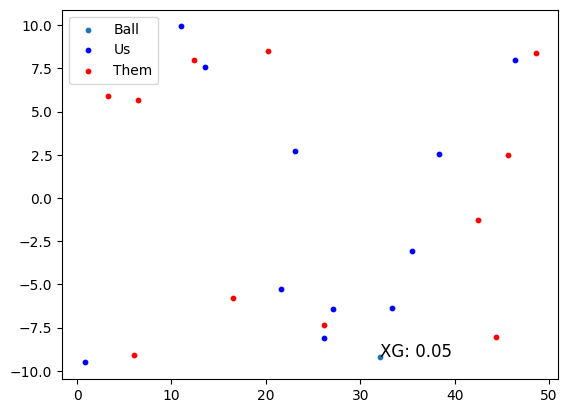

In [73]:
random_line = generate_random_positions(1, 0, 50, -10, 10, 0, 5, 0, 5, 0, 50000)
fig = xg_and_plot(random_line)
plt.legend([ 'Ball', 'Us', 'Them'])
plt.show()